reference: https://vita.had.co.nz/papers/tidy-data.pdf

In [1]:
import pandas
print('pandas',pandas.__version__)
from matplotlib import pyplot as plt
import time

pandas 0.23.4


# Data: Life expectancy at birth per ward

data is from 
https://data.london.gov.uk/dataset/life-expectancy-birth-and-age-65-ward

Tip: Rather than loading from file on disk, read directly from URL

In [2]:
df = pandas.read_csv('https://data.london.gov.uk/download/life-expectancy-birth-and-age-65-ward/38b6745f-168a-493d-9ff4-2b3ba63e86f2/life-expectancy-ward-at-Birth.csv')

What are the dimensions?

In [3]:
df.shape

(669, 77)

In [4]:
df.head(3)

,Ward,Old Ward Code,Local Authority,Ward name,Geography,1999-2003;Male;Life expectancy at birth,1999-2003;Male;95% Lower,1999-2003;Male;95% Upper,1999-2003;Female;Life expectancy at birth,1999-2003;Female;95% Lower,...,2009-13;Male;95% Upper,2009-13;Female;Life expectancy at birth,2009-13;Female;95% Lower,2009-13;Female;95% Upper,2010-14;Male;Life expectancy at birth,2010-14;Male;95% Lower,2010-14;Male;95% Upper,2010-14;Female;Life expectancy at birth,2010-14;Female;95% Lower,2010-14;Female;95% Upper
0,E05000026,00ABFX,Barking and Dagenham,Abbey,Ward,75.9,73.5,78.3,80.3,78.3,...,82.7,83.9,81.3,86.5,80.0,77.5,82.4,83.6,81.0,86.3
1,E05000027,00ABFY,Barking and Dagenham,Alibon,Ward,73.3,71.3,75.3,78.9,77.3,...,79.2,80.6,78.6,82.6,77.0,74.9,79.1,81.4,79.3,83.6
2,E05000028,00ABFZ,Barking and Dagenham,Becontree,Ward,74.9,73.2,76.6,81.0,79.1,...,80.8,79.3,77.7,81.0,79.0,77.1,80.8,79.2,77.6,80.8


Since there are many columns, here I transpose the head to preview content

In [5]:
df.head(3).T

,0,1,2
Ward,E05000026,E05000027,E05000028
Old Ward Code,00ABFX,00ABFY,00ABFZ
Local Authority,Barking and Dagenham,Barking and Dagenham,Barking and Dagenham
Ward name,Abbey,Alibon,Becontree
Geography,Ward,Ward,Ward
1999-2003;Male;Life expectancy at birth,75.9,73.3,74.9
1999-2003;Male;95% Lower,73.5,71.3,73.2
1999-2003;Male;95% Upper,78.3,75.3,76.6
1999-2003;Female;Life expectancy at birth,80.3,78.9,81
1999-2003;Female;95% Lower,78.3,77.3,79.1


Can we use Ward names as identifiers?

In [6]:
df["Ward name"].value_counts().head()

Village       3
Abbey         2
Heathfield    2
St Marys      2
Grange        2
Name: Ward name, dtype: int64

Ward names are not unique, so that's why there is an alphanumeric identifier (the "ward" column)

In [7]:
df["Ward"].value_counts().head()

E05000613    1
E05000615    1
E05000561    1
E05000136    1
E05000277    1
Name: Ward, dtype: int64

Looking at the column names, we see there is structure:
* year range (4 years)
  * male 
    * average life expectancy
    * lower bound
    * upper bound
  * female
    * average life expectancy
    * lower bound
    * upper bound

We need to separate the columns which are not parameters

In [8]:
list(df.columns[0:5])

['Ward', 'Old Ward Code', 'Local Authority', 'Ward name', 'Geography']

In addition to those, we also need to create a new set of columns for the parameters

In [9]:
list_of_col = list(df.columns[0:5])+['start year','end year','gender','average life expectancy at birth','lower bound','upper bound']

now we have a list of columns to work with

In [10]:
list_of_col

['Ward',
 'Old Ward Code',
 'Local Authority',
 'Ward name',
 'Geography',
 'start year',
 'end year',
 'gender',
 'average life expectancy at birth',
 'lower bound',
 'upper bound']

we need to populate the dataframe that has those columns

Look at the first row of the original data frame:

In [11]:
df.loc[0].head(10)

Ward                                                    E05000026
Old Ward Code                                              00ABFX
Local Authority                              Barking and Dagenham
Ward name                                                   Abbey
Geography                                                    Ward
1999-2003;Male;Life expectancy at birth                      75.9
1999-2003;Male;95% Lower                                     73.5
1999-2003;Male;95% Upper                                     78.3
1999-2003;Female;Life expectancy at birth                    80.3
1999-2003;Female;95% Lower                                   78.3
Name: 0, dtype: object

we can start by getting only the columns that start with a year  by skipping the first 5 columns

In [12]:
df.loc[0][5:].head(10)

1999-2003;Male;Life expectancy at birth      75.9
1999-2003;Male;95% Lower                     73.5
1999-2003;Male;95% Upper                     78.3
1999-2003;Female;Life expectancy at birth    80.3
1999-2003;Female;95% Lower                   78.3
1999-2003;Female;95% Upper                   82.4
2000-2004;Male;Life expectancy at birth      74.3
2000-2004;Male;95% Lower                     72.2
2000-2004;Male;95% Upper                     76.3
2000-2004;Female;Life expectancy at birth    81.1
Name: 0, dtype: object

Now that we have the columns which need to be separated as parameters, split the column names inside a loop

In [13]:
for col_name, val in df.loc[0][5:].head(10).items():
    print('column:',col_name.split(';'),'| value:',val)    

column: ['1999-2003', 'Male', 'Life expectancy at birth'] | value: 75.9
column: ['1999-2003', 'Male', '95% Lower'] | value: 73.5
column: ['1999-2003', 'Male', '95% Upper'] | value: 78.3
column: ['1999-2003', 'Female', 'Life expectancy at birth'] | value: 80.3
column: ['1999-2003', 'Female', '95% Lower'] | value: 78.3
column: ['1999-2003', 'Female', '95% Upper'] | value: 82.4
column: ['2000-2004', 'Male', 'Life expectancy at birth'] | value: 74.3
column: ['2000-2004', 'Male', '95% Lower'] | value: 72.2
column: ['2000-2004', 'Male', '95% Upper'] | value: 76.3
column: ['2000-2004', 'Female', 'Life expectancy at birth'] | value: 81.1


additional splitting is needed to access each value

In [14]:
for col_name, val in df.loc[0][5:].head(10).items():
    col_name_as_list = col_name.split(';')
    print('years:',col_name_as_list[0].split('-'),'gender:',col_name_as_list[1],'| which:',col_name_as_list[2],'| value:',val)    

years: ['1999', '2003'] gender: Male | which: Life expectancy at birth | value: 75.9
years: ['1999', '2003'] gender: Male | which: 95% Lower | value: 73.5
years: ['1999', '2003'] gender: Male | which: 95% Upper | value: 78.3
years: ['1999', '2003'] gender: Female | which: Life expectancy at birth | value: 80.3
years: ['1999', '2003'] gender: Female | which: 95% Lower | value: 78.3
years: ['1999', '2003'] gender: Female | which: 95% Upper | value: 82.4
years: ['2000', '2004'] gender: Male | which: Life expectancy at birth | value: 74.3
years: ['2000', '2004'] gender: Male | which: 95% Lower | value: 72.2
years: ['2000', '2004'] gender: Male | which: 95% Upper | value: 76.3
years: ['2000', '2004'] gender: Female | which: Life expectancy at birth | value: 81.1


now we have an output that looks similar to what the data structure should be

In [15]:
for col_name, val in df.loc[0][5:].head(10).items():
    col_name_as_list = col_name.split(';')
    print('start year:',col_name_as_list[0].split('-')[0],
          '| end year:',col_name_as_list[0].split('-')[1],
          '| gender:',col_name_as_list[1],
          '| which:',col_name_as_list[2],
          '| value:',val)

start year: 1999 | end year: 2003 | gender: Male | which: Life expectancy at birth | value: 75.9
start year: 1999 | end year: 2003 | gender: Male | which: 95% Lower | value: 73.5
start year: 1999 | end year: 2003 | gender: Male | which: 95% Upper | value: 78.3
start year: 1999 | end year: 2003 | gender: Female | which: Life expectancy at birth | value: 80.3
start year: 1999 | end year: 2003 | gender: Female | which: 95% Lower | value: 78.3
start year: 1999 | end year: 2003 | gender: Female | which: 95% Upper | value: 82.4
start year: 2000 | end year: 2004 | gender: Male | which: Life expectancy at birth | value: 74.3
start year: 2000 | end year: 2004 | gender: Male | which: 95% Lower | value: 72.2
start year: 2000 | end year: 2004 | gender: Male | which: 95% Upper | value: 76.3
start year: 2000 | end year: 2004 | gender: Female | which: Life expectancy at birth | value: 81.1


need to make average, lower, upper all one row

In [16]:
locl_dict={}
for col_name, val in df.loc[0][5:].head(10).items():
    col_name_as_list = col_name.split(';')
    if col_name_as_list[2]=='Life expectancy at birth':
        print(locl_dict)
        locl_dict={}
        locl_dict['start year']=col_name_as_list[0].split('-')[0]
        locl_dict['end year']=col_name_as_list[0].split('-')[1]
        locl_dict['gender']=col_name_as_list[1]
    locl_dict[col_name_as_list[2]]=val

{}
{'start year': '1999', 'end year': '2003', 'gender': 'Male', 'Life expectancy at birth': 75.900000000000006, '95% Lower': 73.5, '95% Upper': 78.299999999999997}
{'start year': '1999', 'end year': '2003', 'gender': 'Female', 'Life expectancy at birth': 80.299999999999997, '95% Lower': 78.299999999999997, '95% Upper': 82.400000000000006}
{'start year': '2000', 'end year': '2004', 'gender': 'Male', 'Life expectancy at birth': 74.299999999999997, '95% Lower': 72.200000000000003, '95% Upper': 76.299999999999997}


In [17]:
list_of_df_rows = []

locl_dict={}
for col_name, val in df.loc[0][5:].items():
    col_name_as_list = col_name.split(';')
    if col_name_as_list[2]=='Life expectancy at birth':
        if len(locl_dict)>0:
            list_of_df_rows.append(locl_dict)
        locl_dict={}
        locl_dict['start year']=col_name_as_list[0].split('-')[0]
        locl_dict['end year']=col_name_as_list[0].split('-')[1]
        locl_dict['gender']=col_name_as_list[1]
    locl_dict[col_name_as_list[2]]=val

In [18]:
df_corrected = pandas.DataFrame(list_of_df_rows)
df_corrected.head()

,95% Lower,95% Upper,Life expectancy at birth,end year,gender,start year
0,73.5,78.3,75.9,2003,Male,1999
1,78.3,82.4,80.3,2003,Female,1999
2,72.2,76.3,74.3,2004,Male,2000
3,79.0,83.2,81.1,2004,Female,2000
4,73.4,77.7,75.6,2005,Male,2001


while the above is correct (for only the first row), the ward information is missing

In [19]:
df.loc[0][0:4]

Ward                          E05000026
Old Ward Code                    00ABFX
Local Authority    Barking and Dagenham
Ward name                         Abbey
Name: 0, dtype: object

below we add the ward information in columns

In [20]:
list_of_df_rows = []

locl_dict={}
for col_name, val in df.loc[0][5:].items():
    col_name_as_list = col_name.split(';')
    if col_name_as_list[2]=='Life expectancy at birth':
        if len(locl_dict)>0:
            list_of_df_rows.append(locl_dict)
        locl_dict={}
        for col,v in df.loc[0][0:4].items():
            locl_dict[col]=v
        locl_dict['start year']=col_name_as_list[0].split('-')[0]
        locl_dict['end year']=col_name_as_list[0].split('-')[1]
        locl_dict['gender']=col_name_as_list[1]
    locl_dict[col_name_as_list[2]]=val

convert the list of dictionaries to a dataframe

In [21]:
df_corrected = pandas.DataFrame(list_of_df_rows)
df_corrected.head()

,95% Lower,95% Upper,Life expectancy at birth,Local Authority,Old Ward Code,Ward,Ward name,end year,gender,start year
0,73.5,78.3,75.9,Barking and Dagenham,00ABFX,E05000026,Abbey,2003,Male,1999
1,78.3,82.4,80.3,Barking and Dagenham,00ABFX,E05000026,Abbey,2003,Female,1999
2,72.2,76.3,74.3,Barking and Dagenham,00ABFX,E05000026,Abbey,2004,Male,2000
3,79.0,83.2,81.1,Barking and Dagenham,00ABFX,E05000026,Abbey,2004,Female,2000
4,73.4,77.7,75.6,Barking and Dagenham,00ABFX,E05000026,Abbey,2005,Male,2001


repeat the above sequence for _all_ rows by adding another for loop

In [22]:
list_of_df_rows = []

locl_dict={}
for row_indx in range(df.shape[0]):
    for col_name, val in df.loc[row_indx][5:].items():
        col_name_as_list = col_name.split(';')
        if col_name_as_list[2]=='Life expectancy at birth':
            if len(locl_dict)>0:
                list_of_df_rows.append(locl_dict)
            locl_dict={}
            for col,v in df.loc[row_indx][0:4].items():
                locl_dict[col]=v
            locl_dict['start year']=col_name_as_list[0].split('-')[0]
            locl_dict['end year']=col_name_as_list[0].split('-')[1]
            locl_dict['gender']=col_name_as_list[1]
        locl_dict[col_name_as_list[2]]=val

In [23]:
df_corrected = pandas.DataFrame(list_of_df_rows)
df_corrected.shape

(16055, 10)

Sanity check: original data frame was (669, 77). Did we preserve all the data?

In [24]:
16055*10

160550

In [25]:
669*77

51513

reason for this difference (new df has more data than original df): some of the "data" was actually part of the column name (the year)

This is the revised dataframe with separate columns per parameter

In [26]:
df_corrected.head()

,95% Lower,95% Upper,Life expectancy at birth,Local Authority,Old Ward Code,Ward,Ward name,end year,gender,start year
0,73.5,78.3,75.9,Barking and Dagenham,00ABFX,E05000026,Abbey,2003,Male,1999
1,78.3,82.4,80.3,Barking and Dagenham,00ABFX,E05000026,Abbey,2003,Female,1999
2,72.2,76.3,74.3,Barking and Dagenham,00ABFX,E05000026,Abbey,2004,Male,2000
3,79.0,83.2,81.1,Barking and Dagenham,00ABFX,E05000026,Abbey,2004,Female,2000
4,73.4,77.7,75.6,Barking and Dagenham,00ABFX,E05000026,Abbey,2005,Male,2001


The consequence is that analyzing this revised structure is much easier

<!--
I'm not clear here whether I should apply https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html (or possibly https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html )
-->

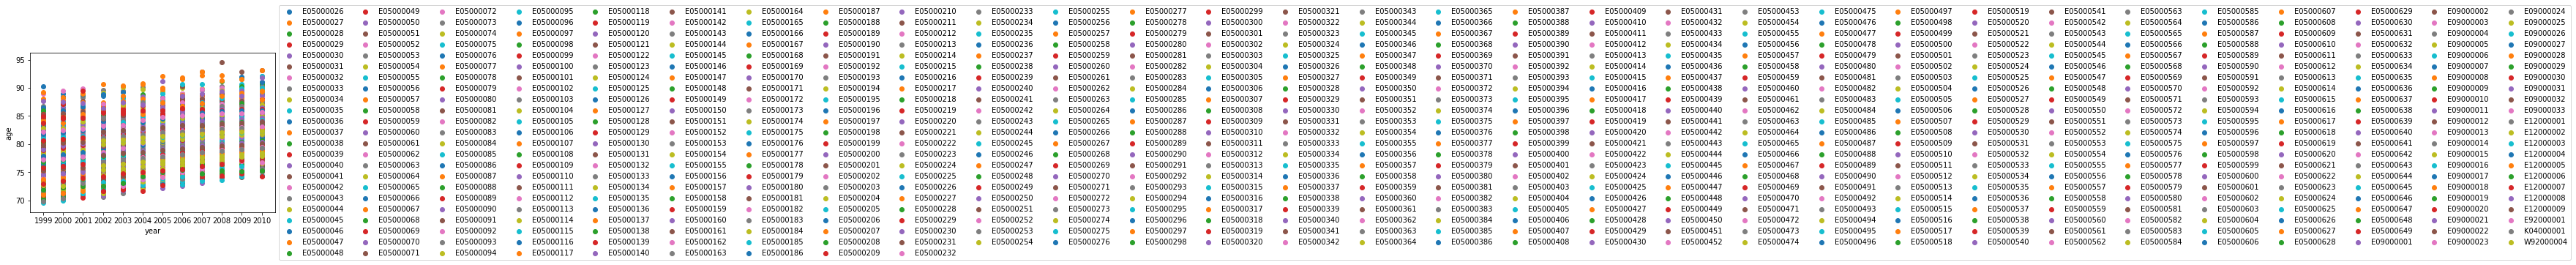

In [27]:
for name, group_df in df_corrected.groupby('Ward'):
    plt.scatter(group_df['start year'],group_df['Life expectancy at birth'],label=name)
plt.ylabel('age')
plt.xlabel('year')
plt.gca().legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol=30)
plt.show()